In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the heart.csv dataset from Colab's content folder
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to inspect
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
print("Number of duplicates:", data.duplicated().sum())

Number of duplicates: 723


In [4]:
data_cleaned = data.drop_duplicates()

In [5]:
print("Number of duplicates after cleaning:", data_cleaned.duplicated().sum())

Number of duplicates after cleaning: 0


In [6]:
print("Total number of rows:", data_cleaned.shape[0])

Total number of rows: 302


In [7]:
# Define features (X) and target (y)
X = data_cleaned.drop('target', axis=1)
y = data_cleaned['target']

# Standardizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate Logistic Regression performance
print("Logistic Regression Accuracy Score:", accuracy_score(y_test, y_pred_log_reg))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest performance
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy Score: 0.8241758241758241

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.78      0.88      0.83        43

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91

Random Forest Accuracy Score: 0.8241758241758241

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.78      0.88      0.83        43

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



Feature Importances:
cp: 0.1523
thalach: 0.1335
oldpeak: 0.1271
ca: 0.1031
age: 0.0923
thal: 0.0850
chol: 0.0793
trestbps: 0.0728
exang: 0.0451
slope: 0.0426
sex: 0.0310
restecg: 0.0255
fbs: 0.0103


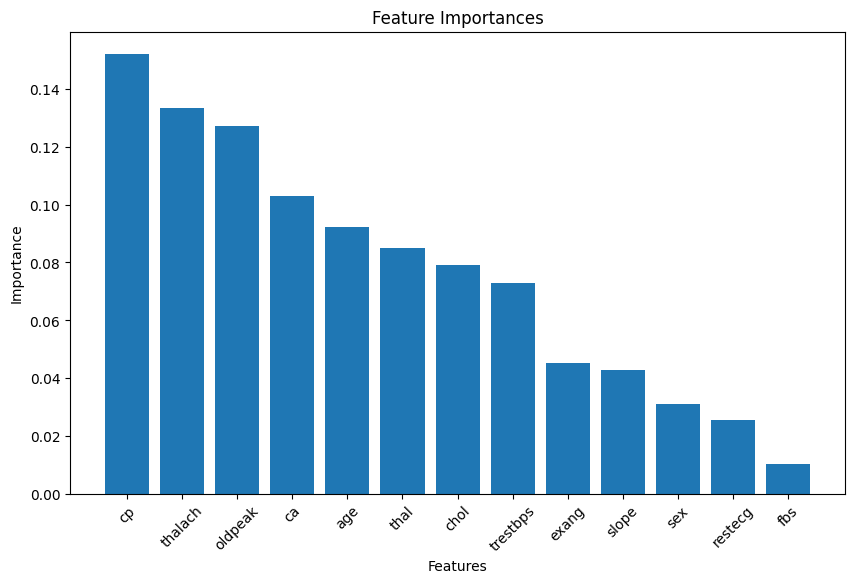

In [11]:
import matplotlib.pyplot as plt
import numpy as np
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort indices by importance in descending order

# Feature Names (if you have them)
feature_names = data_cleaned.drop('target', axis=1).columns  # Replace 'target' with your actual column name for the target

# Print Feature Importance
print("Feature Importances:")
for i in range(len(feature_names)):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()